# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1160]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Итак, прочитаем нашу таблицу:

In [1161]:
churn_data = pd.read_csv('data_2/churn.csv', sep = ',')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [1162]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


График распределения целевого признака:

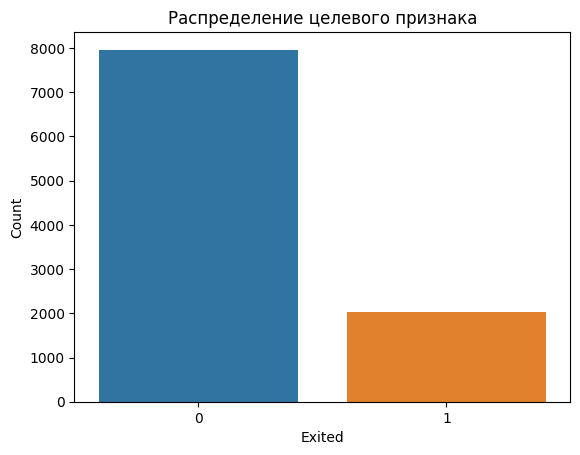

In [1163]:
sns.countplot(data=churn_data, x='Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Распределение целевого признака')
plt.show()

Диаграммы, показывающие взаимосвязь между признаками и целевым признаком:

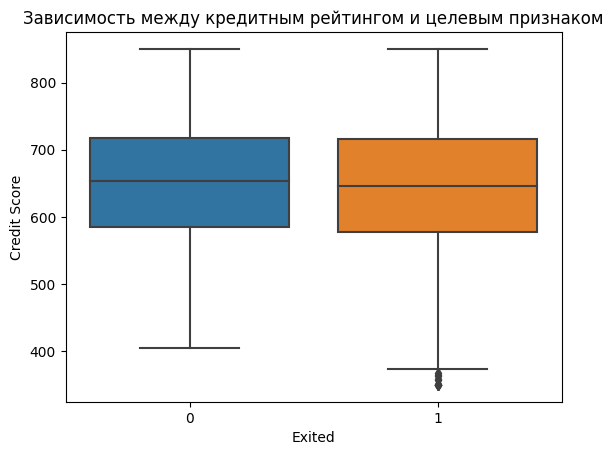

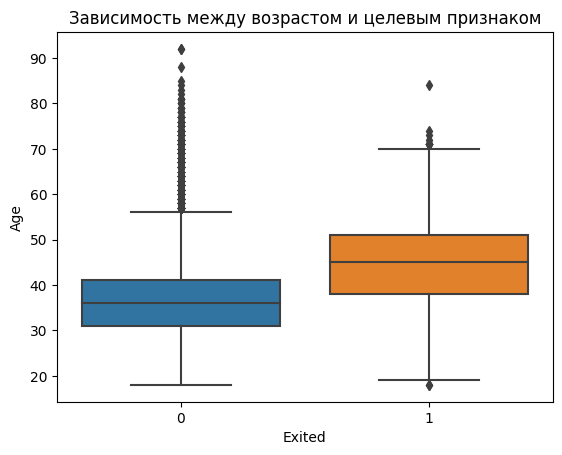

In [1164]:
#График зависимости между кредитным рейтингом и целевым признаком
sns.boxplot(data=churn_data, x='Exited', y='CreditScore')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.title('Зависимость между кредитным рейтингом и целевым признаком')
plt.show()

# График зависимости между возрастом и целевым признаком
sns.boxplot(data=churn_data, x='Exited', y='Age')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Зависимость между возрастом и целевым признаком')
plt.show()

Другие диаграммы, иллюстрирующие предоставленные данные:

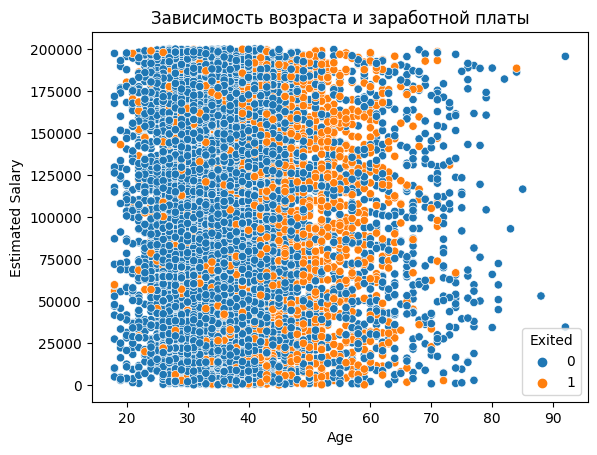

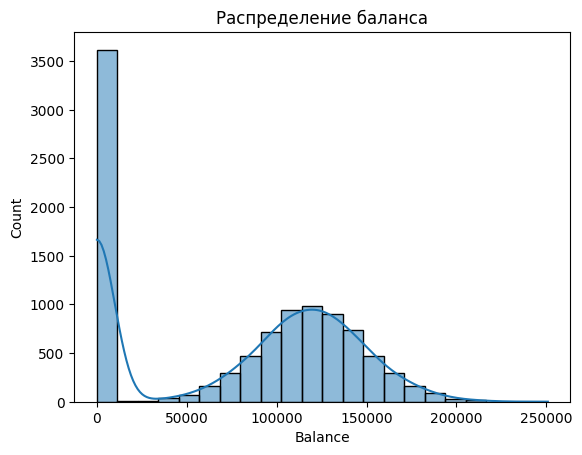

In [1165]:
# Диаграмма рассеяния между возрастом и заработной платой
sns.scatterplot(data=churn_data, x='Age', y='EstimatedSalary', hue='Exited')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Зависимость возраста и заработной платы')
plt.show()

# Гистограмма распределения баланса на счете
sns.histplot(data=churn_data, x='Balance', kde=True)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Распределение баланса')
plt.show()


Оцениваем мультиколинеарность и взаимосвязь с целевым признаком:

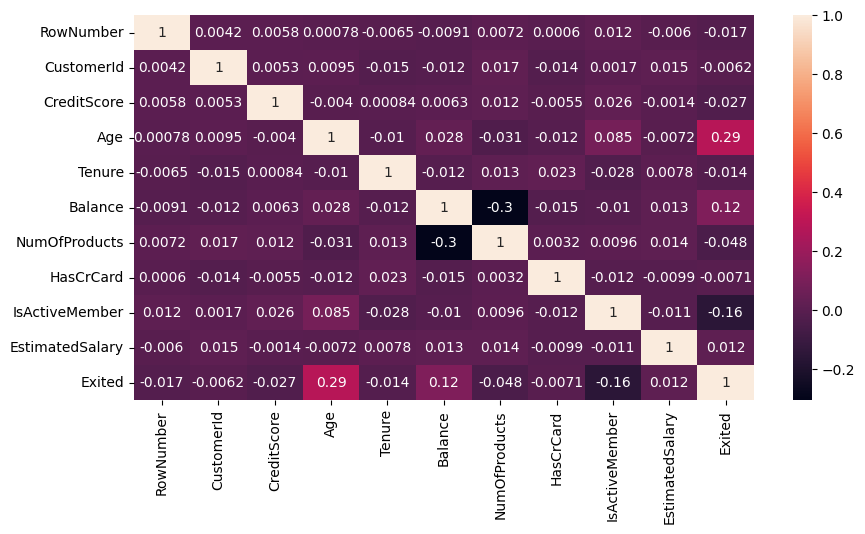

In [1166]:
plt.figure(figsize = (10, 5))
sns.heatmap(churn_data.corr(), annot = True);

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [1167]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [1168]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [1169]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [1170]:
churn_data[churn_data.duplicated()].sum()

CreditScore        0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [1171]:
#Создаем новые признаки
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / churn_data['Age']
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,Female,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,Male,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,Male,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,Male,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,Female,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [1172]:
churn_data = pd.get_dummies(churn_data, drop_first=True)
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Male
7,376,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517,0
15,616,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889,1
16,653,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621,1
26,756,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000,1
28,574,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837,0


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [1173]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [1174]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [1175]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [1176]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Так как данные являются не нормально распределенными или имеют выбросы, мы используем метод RobustScaler для стандартизации данных.
UPD: в дальнейшей работе модель показывала плохие результаты, в итоге было принято решение провести нормализацию с помощью MinMaxScaler.

In [1177]:
#Производим нормализацию данных с помощью min-max нормализации
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> F1-мера (F1-score) -  эта метрика является подходящей в данной задаче, где важно минимизировать как ложноположительные, так и ложноотрицательные срабатывания модели.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> На примере данной задачи ложноположительное срабатывание будет означать, что модель ошиблась и предсказала отток клиента, который не собирался уходить - клиенту был сделан звонок. Ложноотрицательное срабатывание будет означать, что модель ошиблась и не сделала звонок клиенту (не было сделано специальное предложение для этого клиента) и он ушел - модель не смогла предсказать его уход. 
F-мера является средним гармоничным между precision (точносью) и recall (полнотой) - позволяет балансировать количество ложноположительный и ложноотрицательных срабатываний модели. При улучшении данной метрики мы будем пытаться достичь баланса между минимизацией ошибок обоих видов (ошибки I и II рода) и максимизацией производительности модели.

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1178]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=42, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

#Предсказание меток классов для тренировочной и тестовой выборок
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчета о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчета о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1271
           1       0.63      0.40      0.49       610

    accuracy                           0.73      1881
   macro avg       0.69      0.64      0.65      1881
weighted avg       0.72      0.73      0.71      1881

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       424
           1       0.62      0.38      0.47       204

    accuracy                           0.72       628
   macro avg       0.68      0.63      0.64       628
weighted avg       0.71      0.72      0.70       628



> 1. Precision: Модель достигает точности около 76% на тренировочной выборке и около 75% на тестовой выборке для класса 0. Для класса 1 - около 63% на тренировочной выборке и около 62% на тестовой выборке. Более высокая точность для класса 0 говорит, что предсказания для клиентов, которые не собираются уходить немного точнее.
> 2. Recall: Модель достигает полноты около 89% на тренировочной и тестовой выборке для класса 0. Для класса 1 - около 40% на тренировочной выборке и около 38% на тестовой. Более высокий показатель полноты для класса 0 указывает на способность модели правильно определять клиентов, которые останутся, в отличие от класса 0. 
> 3. F1-score: показатель F1-меры около 82% на тренировочной выборке и 81% на тестовой выборке для класса 0. Для класса 1 - 
49% на тренировочной выборке и около 47% на тестовой выборке. Высокое значение F1-меры для класса 0 говорит о более сбалансированном предсказании между точностью и полнотой для клиентов, которые не собираются уходить.
> 4. Accuracy: Модель достигает точности около 73% на тренировочной выборке и около 72% на тестовой выборке. Accuracy показывает долю  правильных предсказаний модели. В данном случае отдельно на эту метрику не стоит обращать внимание, так как она плохо работает для несбалансированных классов.

> * Исходя из этих метрик, можно сделать вывод, что модель имеет не очень хорошие результаты предсказания, скорее, средние. Модель требует улучшения.

> При управлении параметрами 'penalty' и 'C' с разными показателями, метрики менятся незначительно.

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1179]:
#Генерация полиномиальных признаков третьей степени
poly_features = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly_features.fit(X_train_scaled)
X_train_poly = poly_features.transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

#Обучение модели логистической регрессии на полиномиальных признаках
log_reg_poly = linear_model.LogisticRegression(random_state=42)
log_reg_poly.fit(X_train_poly, y_train)

#Предсказание меток классов для тренировочной и тестовой выборок
y_train_pred_poly = log_reg_poly.predict(X_train_poly)
y_test_pred_poly = log_reg_poly.predict(X_test_poly)

print(metrics.classification_report(y_train, y_train_pred_poly))
print(metrics.classification_report(y_test, y_test_pred_poly))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      1271
           1       0.78      0.56      0.65       610

    accuracy                           0.81      1881
   macro avg       0.80      0.74      0.76      1881
weighted avg       0.80      0.81      0.80      1881

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       424
           1       0.73      0.56      0.64       204

    accuracy                           0.79       628
   macro avg       0.77      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



> 1. Использование полиномиальных признаков третьей степени привело к улучшению общего качества модели на обеих выборках. Метрика F1 и precision для обоих классов увеличились.
> 2. Метрика recall для класса 1 также увеличилась, что говорит о более эффективном обнаружении положительных случаев.
> 3. Общая точность модели (accuracy) увеличилась на тренировочной выборке с 0.73 до 0.81 и на тестовой выборке с 0.72 до 0.79.
> * Таким образом можно сделать вывод, что использование полиномиальных признаков третьей степени привело к улучшению качества модели, что свидетельствует о более точном предсказании классов и лучшей способности модели обнаруживать положительные случаи.

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

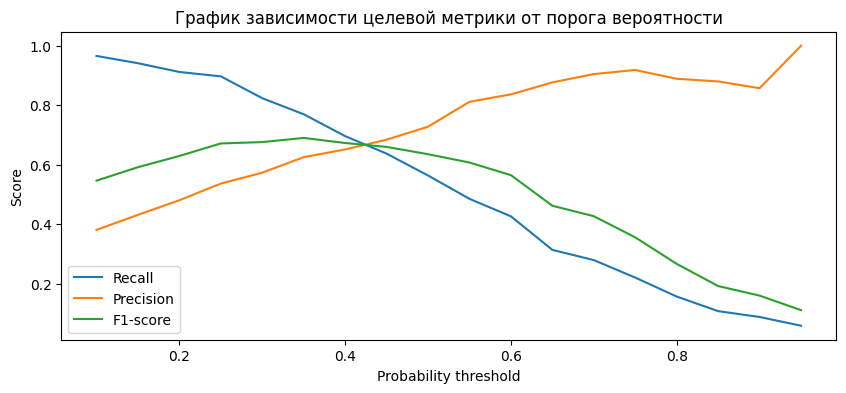

In [1180]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1])

# Инициализируем списки, куда будем сохранять метрики
recall_scores = []
precision_scores = []
f1_scores = []

# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)

# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    
    # Рассчитываем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred_poly))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred_poly))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))

# Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4))
# Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
# Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
# Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
# Даем графику название и подписи осям
ax.set_title('График зависимости целевой метрики от порога вероятности')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')

# Отображаем легенду
ax.legend();


In [1181]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.40
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       424
           1       0.65      0.70      0.67       204

    accuracy                           0.78       628
   macro avg       0.75      0.76      0.75       628
weighted avg       0.78      0.78      0.78       628



Вывод: 

* Применение оптимального порога вероятностей позволило улучшить метрики F1 и recall для класса 1 по сравнению с результатами модели на полиномиальных признаках.
* Метрика precision для класса 1 также улучшилась, что говорит о снижении ложноположительных предсказаний.
* Общая точность модели (accuracy) снизилась до 0.78, что объясняется установкой более строгого порога.
* Применение оптимального порога вероятностей позволило достичь лучшего баланса между точностью и полнотой для класса 1. 

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [1182]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Импортируем необходимые для выполнения практики модули:

In [1183]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1184]:
# Создаем объект класса DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

# Обучаем модель на тренировочных данных
dt.fit(X_train, y_train)

# Делаем предсказания на тренировочной и тестовой выборках
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Выводим отчет о метриках на тренировочной выборке
print("Train metrics:")
print(metrics.classification_report(y_train, y_train_pred))
print('F1-score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

# Выводим отчет о метриках на тестовой выборке
print("Test metrics:")
print(metrics.classification_report(y_test, y_test_pred))
print('F1-score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881

F1-score: 1.00
Test metrics:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       424
           1       0.54      0.51      0.53       204

    accuracy                           0.70       628
   macro avg       0.66      0.65      0.65       628
weighted avg       0.70      0.70      0.70       628

F1-score: 0.53


> Исходя из представленных результатов, можно сделать вывод, что полученная модель дерева решений склонна к переобучению, то есть она слишком хорошо подстроилась под тренировочные данные и не обобщает данные на тестовой выборке. Скорей всего это произошло из-за использования неорганиченности максимальной глубины.

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [1185]:
# Создаем объект класса DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42,
    max_depth=8,
    min_samples_leaf=10)

# Обучаем модель на тренировочных данных
dt.fit(X_train, y_train)

# Делаем предсказания на тренировочной и тестовой выборках
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Выводим отчет о метриках на тренировочной выборке
print("Train metrics:")
print(metrics.classification_report(y_train, y_train_pred))
print('F1-score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

# Выводим отчет о метриках на тестовой выборке
print("Test metrics:")
print(metrics.classification_report(y_test, y_test_pred))
print('F1-score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train metrics:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881

F1-score: 0.72
Test metrics:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       424
           1       0.72      0.59      0.65       204

    accuracy                           0.79       628
   macro avg       0.77      0.74      0.75       628
weighted avg       0.79      0.79      0.79       628

F1-score: 0.65


> Параметры модели могут оказывать значительное влияние на ее производительность и обобщающую способность. Текущая модель показывает незначительное улучшение в точности и F1-мере для обоих классов на тестовой выборке по сравнению с предыдущими моделями. Однако, полнота для класса 1 немного снизилась. Обобщающая способность модели все также относительно низкая, особенно для класса 1, где F1-мера составляет 0.65, что говорит о том, что модель все еще имеет проблемы переобучения.

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [1186]:
#Создаём объект класса RandomForestClassifier
rf = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf.fit(X_train, y_train)
 
#Делаем предсказание класса
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Выводим отчет о метриках на тренировочной выборке
print("Train metrics:")
print(metrics.classification_report(y_train, y_train_pred))
print('F1-score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

# Выводим отчет о метриках на тестовой выборке
print("Test metrics:")
print(metrics.classification_report(y_test, y_test_pred))
print('F1-score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train metrics:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1271
           1       0.86      0.63      0.73       610

    accuracy                           0.85      1881
   macro avg       0.85      0.79      0.81      1881
weighted avg       0.85      0.85      0.84      1881

F1-score: 0.73
Test metrics:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       424
           1       0.74      0.57      0.64       204

    accuracy                           0.79       628
   macro avg       0.78      0.74      0.75       628
weighted avg       0.79      0.79      0.79       628

F1-score: 0.64


> Использование случайного леса с данными параметрами незначительно улучшило метрики по сравнению с деревом решений на тестовой выборке. Случайный лес показывает почти идентичную F1-меру для обоих классов и общую точность по сравнению с одним деревом решений. Однако случайный лес продемонстрировал небольшое улучшение в точности и полноте для класса 1.

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

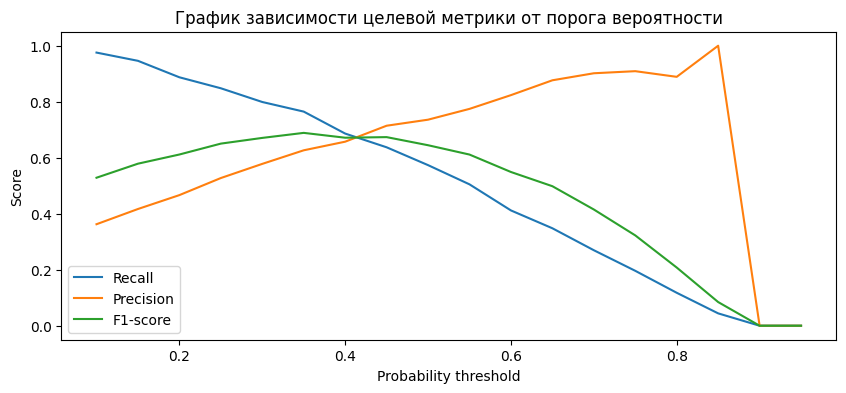

In [1187]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(rf.predict_proba(X_test)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
recall_scores = []
precision_scores = []
f1_scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    # Рассчитываем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))
    
# Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4))
# Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
# Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
# Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
# Даем графику название и подписи осям
ax.set_title('График зависимости целевой метрики от порога вероятности')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')

# Отображаем легенду
ax.legend();

In [1188]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.40
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       424
           1       0.66      0.69      0.67       204

    accuracy                           0.78       628
   macro avg       0.75      0.76      0.75       628
weighted avg       0.78      0.78      0.78       628



> Было выполнено обучение и оценка трех моделей машинного обучения для задачи прогнозирования оттока клиентов. 
После обучения и оценки моделей было принято решение, что модель случайного леса показала наилучший результат в сравнении с другими моделями. 
Таким образом, модель случайного леса показала наилучший общий результат среди рассмотренных моделей, обеспечивая достаточно высокую точность и F1-меру. Однако, следует отметить, что модель все же еще не идеальна и требуются дальнейшие улучшения.

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [1189]:
# Создаем DataFrame с данными Василия
vasily_data = pd.DataFrame({
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
})
#Создаем новые признаки
vasily_data['BalanceSalaryRatio'] = vasily_data['Balance'] / vasily_data['EstimatedSalary']
vasily_data['TenureByAge'] = vasily_data['Tenure'] / vasily_data['Age']
vasily_data['CreditScoreGivenAge'] = vasily_data['CreditScore'] / vasily_data['Age']

#Перекодируем категориальные признаки
vasily_data['Gender_Male'] = (vasily_data['Gender'] == 'Male').astype(int)
vasily_data = vasily_data.drop('Gender', axis=1) 

#Масштабируем признаки:
vasily_data_scaled = scaler.transform(vasily_data)

vasily_data_poly = poly_features.transform(vasily_data_scaled)

vasily_data_log = log_reg_poly.predict_proba(vasily_data_poly)
vasily_data_scaled_dt = dt.predict_proba(vasily_data)
vasily_data_scaled_rf = rf.predict_proba(vasily_data)

print('Вероятность ухода клиента: {}'.format(np.round(vasily_data_log)))
print('Вероятность ухода клиента: {}'.format(np.round(vasily_data_scaled_dt)))
print('Вероятность ухода клиента: {}'.format(np.round(vasily_data_scaled_rf)))

Вероятность ухода клиента: [[0. 1.]]
Вероятность ухода клиента: [[0. 1.]]
Вероятность ухода клиента: [[0. 1.]]
